## Mini-Project Title: Building a Text Classification Model for News Categorization

## Overview
This project focuses on using Natural Language Processing (NLP) techniques to build a text classification model for news categorization. With a large influx of news articles daily, manual categorization is inefficient. Automating this process using NLP ensures scalability, accuracy, and consistency.


## Objective
Develop an NLP-powered machine learning model that categorizes news articles into predefined categories such as Politics, Sports, Technology, Entertainment, and Health. This project covers the complete NLP pipeline, including preprocessing, feature extraction, model training, evaluation, and deployment.

## Learning Outcomes
1. Understand text preprocessing techniques like tokenization, stopword removal, and stemming/lemmatization.
2. Explore feature extraction methods such as Bag of Words, TF-IDF, and word embeddings.
3. Learn to use NLP libraries like NLTK, spaCy, and Hugging Face Transformers.
4. Experiment with NLP-specific models such as LSTM, BERT, or other transformer-based models.
5. Gain experience in deploying NLP models via APIs.


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Automation of news categorization using NLP can save time, improve accuracy, and enhance user experience by organizing content effectively.

### Mini-task:
Write a brief paragraph on how NLP benefits the media industry in automating news categorization.


Natural Language Processing (NLP) significantly benefits the media industry by automating the categorization of news content. Through techniques like text classification and topic modeling, NLP enables media organizations to automatically sort articles into predefined categories such as politics, sports, entertainment, and technology. This streamlines content management, improves user experience through personalized recommendations, and reduces the time and effort required for manual sorting. Additionally, NLP helps in maintaining consistency in tagging and enhances searchability across vast news archives.

## Step 2: Data Collection
### Task:
Collect a dataset of news articles suitable for text classification. Publicly available datasets such as the AG News dataset or datasets from Kaggle can be used.

### Mini-task:
Download and load a suitable dataset for NLP tasks.


## The AG News Classification CSV file used for this task was gotten from Kaggle

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set path to the News_data folder
base_path = '/content/drive/My Drive/AI ML 3MTT/News_data'

# Load AG News train and test CSV files
train_df = pd.read_csv(f'{base_path}/train.csv')
test_df = pd.read_csv(f'{base_path}/test.csv')

# Combine the Title and Description columns
train_df['Text'] = train_df['Title'] + ' ' + train_df['Description']
test_df['Text'] = test_df['Title'] + ' ' + test_df['Description']

# Display the dataframe
train_df.head()

,Class Index,Title,Description,Text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the text structure, class distribution, and any potential imbalances.

### Mini-task:
Visualize the class distribution using a bar chart and inspect a few examples of text data.

Example

```python
import pandas as pd
import matplotlib.pyplot as plt

# Convert dataset to DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

# Inspect a sample
print(df.head())
```

/tmp/ipython-input-3-3282132765.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class Index', data=train_df, palette='viridis')


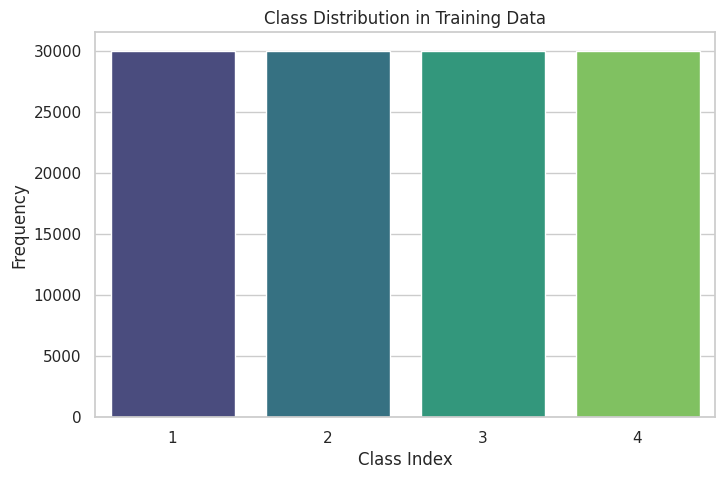

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Bar plot of class counts
plt.figure(figsize=(8,5))
sns.countplot(x='Class Index', data=train_df, palette='viridis')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class Index')
plt.ylabel('Frequency')
plt.show()


/tmp/ipython-input-4-1643836355.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class Index', data=test_df, palette='viridis')


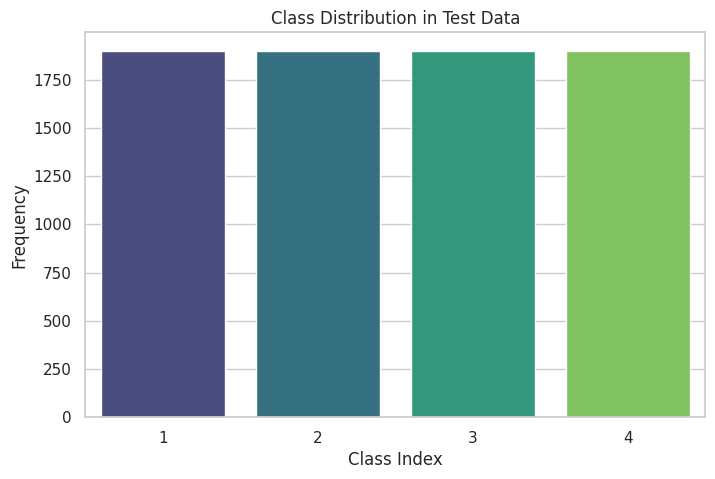

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Bar plot of class counts
plt.figure(figsize=(8,5))
sns.countplot(x='Class Index', data=test_df, palette='viridis')
plt.title('Class Distribution in Test Data')
plt.xlabel('Class Index')
plt.ylabel('Frequency')
plt.show()

## Step 4: Text Preprocessing
### Task:
Preprocess the text data using techniques such as:
- Lowercasing
- Tokenization
- Stopword removal
- Lemmatization (optional)

### Mini-task:
Clean a small sample of the dataset using NLP libraries like NLTK or spaCy.

Example

```python
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned_text']].head())
```


In [3]:
import spacy

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def spacy_preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
    return " ".join(tokens)


In [4]:
import spacy

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def spacy_preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
    return " ".join(tokens)

In [5]:
# Apply to both train and test datasets
train_df['Clean_Text'] = train_df['Text'].apply(spacy_preprocess)
test_df['Clean_Text'] = test_df['Text'].apply(spacy_preprocess)

In [8]:
# View a sample of original and cleaned descriptions side by side
train_df[['Text', 'Clean_Text']].sample(5, random_state=1)

,Text,Clean_Text
76467,"BEA buzzing about Beehive BURLINGAME, CALIF.--...",bea buzz beehive burlingame bea system expand ...
27991,Saudi Violence Pushes Oil Prices Higher Oil pr...,saudi violence push oil price high oil price f...
62646,Storm shows Haiti #39;s straits Muddy waters s...,storm show haiti strait muddy water occupy hea...
28374,Crews Fail to Find Tree-Killing Beetle (AP) AP...,crew fail find tree kill beetle ap ap survey c...
98305,Justice Is Too Light It's too bad Stern stoppe...,justice light bad stern stop game ron artest i...


In [9]:
# Show cleaned examples from each class
for label in sorted(train_df['Class Index'].unique()):
    print(f"\nClass {label} Sample:")
    sample = train_df[train_df['Class Index'] == label].sample(1).iloc[0]
    print("Original:", sample['Text'])
    print("Cleaned:", sample['Clean_Text'])


Class 1 Sample:
Original: Security in Sudan's Darfur a 'Farce' -Rights Group (Reuters) Reuters - Security in Sudan's Darfur region is a\"farce" with the government engaged in ethnic cleansing and\rebel groups looting and abducting civilians in violation of an\April cease-fire, a rights group said on Monday.
Cleaned: security sudan darfur farce group reuters reuter security sudan darfur region government engage ethnic cleansing group loot abduct civilian violation cease fire right group say monday

Class 2 Sample:
Original: Athletics: Suspended judge lives near Hamm ATHENS - The Colombian judge suspended for giving South Korea #39;s Yang Tae-young an incorrect score in the Olympic men #39;s all-round event lives in gold medallist Paul Hamm #39;s home state, International Gymnast magazine reported on Sunday.
Cleaned: athletic suspend judge live near hamm athens colombian judge suspend give south korea yang tae young incorrect score olympic man round event live gold medallist paul hamm h

### Step 5: Feature Engineering
### Task:
Convert the preprocessed text into numerical representations using:
- Bag of Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Pre-trained word embeddings (e.g., GloVe or FastText)

### Mini-task:
Compare the feature matrices generated using TF-IDF and embeddings.

Example

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
```

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF with n-grams and min_df
tfidf_vectorizer = TfidfVectorizer(
    min_df=10,                # remove terms that appear in <10 documents
    ngram_range=(1, 3)        # include unigrams, bigrams, trigrams
)

# Fit on training data and transform both
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['Clean_Text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['Clean_Text'])

# Print vocabulary size and top 100 features
print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
print("First 100 features:")
print(list(tfidf_vectorizer.vocabulary_.keys())[:100])

# Optional: convert to dense arrays (for some ML models)
X_train_array = X_train_tfidf.toarray()
X_test_array = X_test_tfidf.toarray()

Vocabulary size: 48833
First 100 features:
['wall', 'st', 'bears', 'claw', 'black', 'reuter', 'short', 'seller', 'street', 'ultra', 'see', 'green', 'wall st', 'reuter reuter', 'wall street', 'look', 'commercial', 'aerospace', 'private', 'investment', 'firm', 'reputation', 'make', 'time', 'play', 'defense', 'industry', 'quietly', 'bet', 'market', 'private investment', 'investment firm', 'play defense', 'oil', 'economy', 'cloud', 'stock', 'outlook', 'reuters', 'soar', 'crude', 'price', 'plus', 'earning', 'expect', 'week', 'depth', 'doldrum', 'oil economy', 'outlook reuters', 'reuters reuter', 'crude price', 'stock market', 'market week', 'outlook reuters reuter', 'iraq', 'halt', 'export', 'main', 'southern', 'pipeline', 'authority', 'show', 'rebel', 'militia', 'official', 'say', 'saturday', 'oil export', 'pipeline southern', 'southern iraq', 'rebel militia', 'oil official', 'official say', 'say saturday', 'pipeline southern iraq', 'oil official say', 'official say saturday', 'record', 'p

In [11]:
# Install and load spaCy medium model with GloVe
!python -m spacy download en_core_web_md
import spacy

# Load the medium model with 300-dim GloVe vectors
nlp_vec = spacy.load('en_core_web_md')

# Get average GloVe embeddings for each description
import numpy as np

def get_doc_vector(text):
    doc = nlp_vec(text)
    return doc.vector

# Apply to entire dataset
X_train_glove = np.vstack(train_df['Clean_Text'].apply(get_doc_vector).values)
print("GloVe Embedding Matrix Shape:", X_train_glove.shape)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 47.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
GloVe Embedding Matrix Shape: (120000, 300)


In [12]:
X_test_glove = np.vstack(test_df['Clean_Text'].apply(get_doc_vector).values)
print("GloVe Embedding Matrix Shape:", X_test_glove.shape)

GloVe Embedding Matrix Shape: (7600, 300)


In [13]:
print("TF-IDF matrix:     ", X_train_tfidf.shape, " | Sparse, high-dimensional")
print("GloVe embeddings:  ", X_train_glove.shape, " | Dense, low-dimensional (300D)")

TF-IDF matrix:      (120000, 48833)  | Sparse, high-dimensional
GloVe embeddings:   (120000, 300)  | Dense, low-dimensional (300D)


## Step 6: Model Training Using NLP Models
### Task:
Train a machine learning model using features derived from NLP techniques. You can use classical models like Logistic Regression or advanced models like LSTMs or transformers.

### Mini-task:
Train a simple logistic regression model on the TF-IDF features.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```


In [14]:
from sklearn.linear_model import LogisticRegression

y_train = train_df['Class Index']
y_test = test_df['Class Index']


# Initialize and train the Loistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.metrics import accuracy_score, classification_report

# Predict
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9163157894736842

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.91      0.92      1900
           2       0.96      0.98      0.97      1900
           3       0.88      0.89      0.89      1900
           4       0.89      0.89      0.89      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



#### Confusion Matrix

<Figure size 800x600 with 0 Axes>

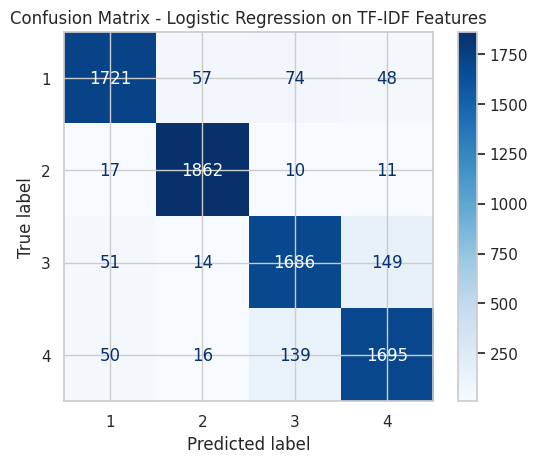

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(test_df['Class Index'], y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Logistic Regression on TF-IDF Features")
plt.show()

## LSTM Model

#### Import necessary Libraries

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#### Prepare the data

In [22]:
# Train-CV split
x_train, x_cv, y_train, y_cv = train_test_split(train_df['Clean_Text'], train_df['Class Index'],test_size=0.2,random_state=42)

vocab_size = 20000
max_len = 100

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
x_train_seq = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=max_len)
x_test_seq = pad_sequences(tokenizer.texts_to_sequences(x_cv), maxlen=max_len)


# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_cv = le.transform(y_cv)

#### Define the LSTM Model

In [23]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=50, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(4, activation='softmax')
])

checkpoint = EarlyStopping(monitor='val_accuracy',patience = 10 ,mode='max')
callbacks_lst = [checkpoint]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#### Train the Model

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

callbacks_lst = [checkpoint]
# Training
batch_size = 256
epochs = 100
print('Train...')


# Train the model
history = model.fit(
    x_train_seq, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks_lst)

Train...
Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 210s 173ms/step - accuracy: 0.7927 - loss: 0.5596 - val_accuracy: 0.9131 - val_loss: 0.2662
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 201s 168ms/step - accuracy: 0.9286 - loss: 0.2188 - val_accuracy: 0.9116 - val_loss: 0.2673
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 201s 168ms/step - accuracy: 0.9438 - loss: 0.1704 - val_accuracy: 0.9064 - val_loss: 0.2773
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 201s 168ms/step - accuracy: 0.9543 - loss: 0.1363 - val_accuracy: 0.9064 - val_loss: 0.3041
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 201s 168ms/step - accuracy: 0.9607 - loss: 0.1140 - val_accuracy: 0.9043 - val_loss: 0.3365


#### Evaluate on the Seperate Test set

In [25]:
# Tokenize and pad test set using the SAME tokenizer
x_real_test_seq = pad_sequences(
    tokenizer.texts_to_sequences(test_df['Clean_Text']),
    maxlen=max_len
)

# Encode the labels
y_real_test = le.transform(test_df['Class Index'])


# Predict on the real test set
y_pred_probs = model.predict(x_real_test_seq)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_real_test, y_pred))
print("\nClassification Report:\n", classification_report(y_real_test, y_pred))


238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
Test Accuracy: 0.9055263157894737

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1900
           1       0.95      0.98      0.96      1900
           2       0.88      0.86      0.87      1900
           3       0.87      0.88      0.88      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



#### Plot Training & Validation Accuracy/Loss

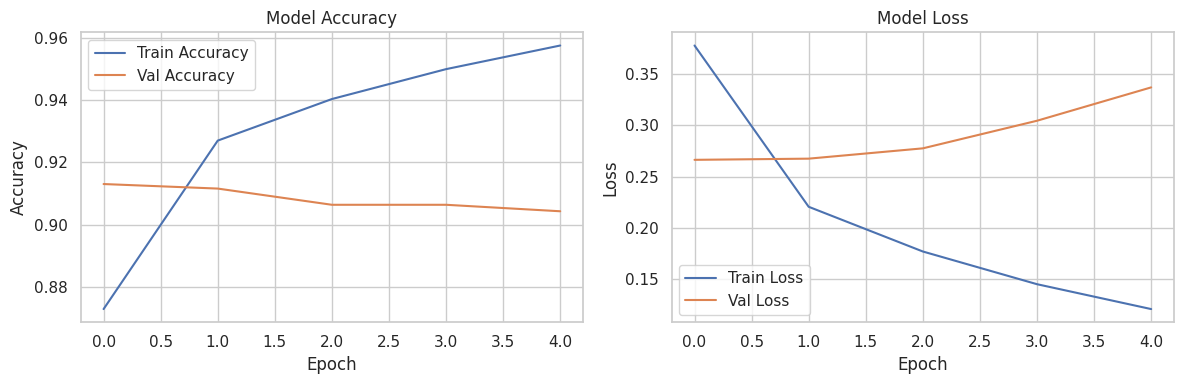

In [26]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Optional: Fine-Tune a BERT Model
Train a transformer-based model using the Hugging Face `transformers` library for state-of-the-art results in text classification.

#### Import the required libraries and prepare the data set

In [6]:
from datasets import Dataset
from transformers import AutoTokenizer

# Use Clean_Description as input and Class Index as label
train_dataset = Dataset.from_pandas(train_df[['Clean_Text', 'Class Index']])
test_dataset = Dataset.from_pandas(test_df[['Clean_Text', 'Class Index']])

# Load tokenizer
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Tokenize
def tokenize_function(example):
    return tokenizer(example['Clean_Text'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

#### Load the pre-trained BERT Model

In [7]:
from transformers import AutoModelForSequenceClassification

# There are 4 classes in AG News
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=4)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
pip install transformers evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.3 MB/s eta 0:00:00


#### Training setup

In [10]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
import evaluate

# Metrics
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return accuracy.compute(predictions=preds, references=labels)

# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_news_model",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
)

# Data collator handles padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

#### Train the model

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()


/tmp/ipython-input-11-2685700641.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: israeltemidayo24 (israeltemidayo24-university-of-ibadan) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


#### Evaluate on the test set

In [ ]:
results = trainer.evaluate()
print(results)